# 🔹 Sabriya Sowers' Bonus Wine Data Analysis 🔹

**Author:** Sabriya Sowers  
**Date:** October 31, 2025  

## Introduction

## Section 1:  Import, Setup Project Theme, and Inspect the Data

In [295]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_wine
import pandas as pd

In [296]:
# Project theme setup
# Useful site to select colors https://www.color-hex.com/color/4b0082
PRIMARY_PURPLE = "#4B0082"   # purple
ACCENT_TEAL    = "#20B2AA"   # teal
NEUTRAL_GRAY   = "#808080"   # gray

# Background with gridlines
sns.set_theme(style="whitegrid")

# Color theme applied to plots that have multiple series,lines,bars
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=[PRIMARY_PURPLE, ACCENT_TEAL, NEUTRAL_GRAY])

# Keep text black for readability
plt.rcParams["text.color"] = "black"
plt.rcParams["axes.labelcolor"] = "black"
plt.rcParams["axes.titlecolor"] = "black"
plt.rcParams["xtick.color"] = "black"
plt.rcParams["ytick.color"] = "black"

In [297]:
# Load the Wine dataset from sklearn
wine_data = load_wine()

# Convert the dataset’s feature data (numeric values only) into a pandas DataFrame
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Add the 'target' column to represent the wine class (0, 1, or 2)
wine['target'] = wine_data.target

# Basic information
wine.info()

# Check for missing values
wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [298]:
# Preview first rows
wine.head() #print(wine.head(10))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [299]:
# Summary statistics
wine.describe() # print(wine.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [300]:
# Alcohol content stats
print("Alcohol Stats:")
print("Min:", wine['alcohol'].min())
print("Median:", wine['alcohol'].median())
print("Max:", wine['alcohol'].max())

Alcohol Stats:
Min: 11.03
Median: 13.05
Max: 14.83


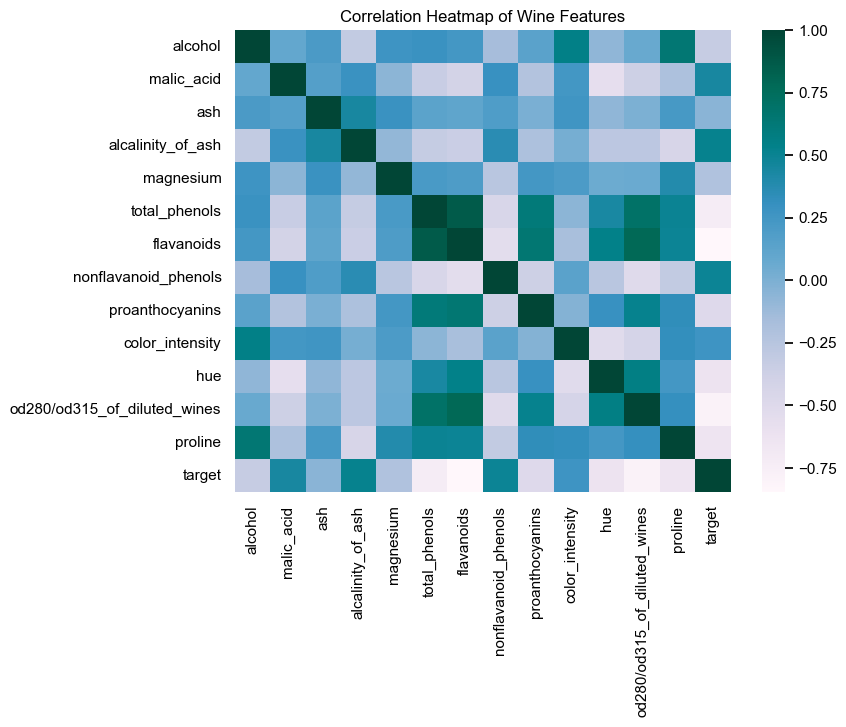

In [301]:
# Check correlations between numeric features
plt.figure(figsize=(8,6))
sns.heatmap(wine.corr(), cmap="PuBuGn", annot=False)
plt.title("Correlation Heatmap of Wine Features")
plt.show()

## Section 2: Data Cleaning

In [302]:
# Check for missing values
print(wine.isnull().sum())

# Check for duplicates
print("Duplicate rows:", wine.duplicated().sum())

# Verify data types
print(wine.dtypes)

# Rename columns that have difficult to underatand names
wine = wine.rename(columns={
    "alcohol": "alcohol_pct",
    "malic_acid": "malic_acid",
    "ash": "ash",
    "alcalinity_of_ash": "ash_alcalinity",
    "magnesium": "magnesium",
    "total_phenols": "total_phenols",
    "flavanoids": "flavonoids",
    "nonflavanoid_phenols": "nonflav_phenols",
    "proanthocyanins": "proanthocyanins",
    "color_intensity": "color_intensity",
    "hue": "color_hue",
    "od280/od315_of_diluted_wines": "phenolic_ratio",
    "proline": "proline",
    "target": "wine_class"
})

wine.head()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
Duplicate rows: 0
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline      

,alcohol_pct,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavonoids,nonflav_phenols,proanthocyanins,color_intensity,color_hue,phenolic_ratio,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Reflection 1:

**1. How many data instances are there?**  
178  

**2. How many features are there?**  
14  

**3. What are the names?**  
alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, and target.  

**4. Are there any missing values?**  
No. All columns have complete data with no missing values.  

**5. Are there any non-numeric features?**  
No. All features are numeric (float64 or int64).  

**6. Are the data instances sorted on any of the attributes?**  
No, the dataset does not appear to be sorted by any feature.  

**7. What are the minimum, median, and maximum values for alcohol?**  
- Minimum: 11.03  
- Median: 13.05  
- Maximum: 14.83  

**8. What two different features have the highest correlation?**  
The strongest correlation is between *flavanoids* and *total_phenols* (≈ 0.86). As total phenols increase the flavanoids tend to increase as well, which makes sense since both describe aspects of wine composition and quality.  

**9. Are there any categorical features that might be useful for prediction?**  
No, all features are numerical.  

**Data Cleaning Notes:**  
Before visualizing, the dataset was checked for missing values, duplicates, and correct data types. No cleaning was required since the data was already complete. Columns were then renamed for readability. For example, `hue` became `color_hue`, `od280/od315_of_diluted_wines` became `phenolic_ratio`, and `target` became `wine_class`to make the visualizations and later analysis easier to interpret.

## Section 3: Data Exploration and Visualization

array([[<Axes: title={'center': 'alcohol_pct'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'ash_alcalinity'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavonoids'}>,
        <Axes: title={'center': 'nonflav_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'color_hue'}>,
        <Axes: title={'center': 'phenolic_ratio'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'wine_class'}>, <Axes: >, <Axes: >]],
      dtype=object)

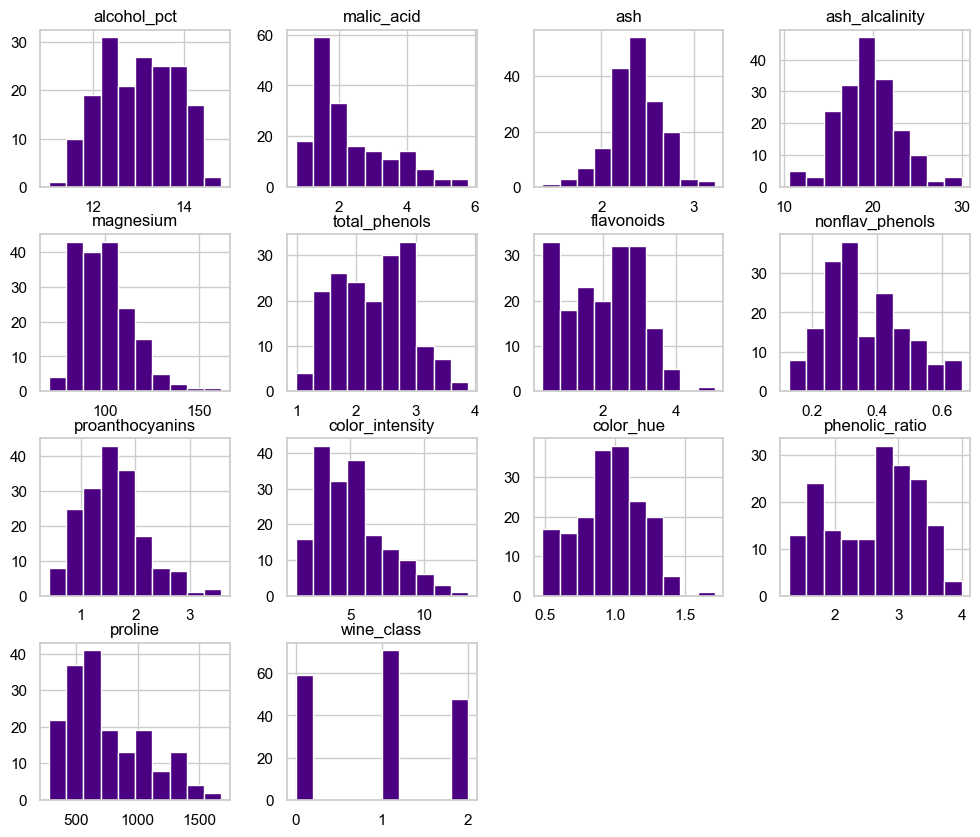

In [303]:
wine.hist(figsize=(12,10), color="#4B0082")

### Scatter Matrix: Alcohol, Color Intensity, & Proline

In [ ]:
sns.set_theme(
    style="whitegrid",
    rc={
        "axes.edgecolor": "#4B0082",
        "grid.color": "#D3D3D3",
        "xtick.color": "black",
        "ytick.color": "black",
        "axes.labelcolor": "black",
        "axes.titlecolor": "#4B0082",
    }
)

sns.pairplot(
    wine[["alcohol_pct", "color_intensity", "proline"]],
    diag_kind="hist",
    corner=False,
    plot_kws={"color": "#4B0082", "alpha": 0.7},
    diag_kws={"color": "#4B0082"}
)

plt.suptitle("Alcohol % / Color Intensity / Proline Relationships", color="#4B0082")
plt.show()

### Alcohol vs Color Intensity by Wine Class

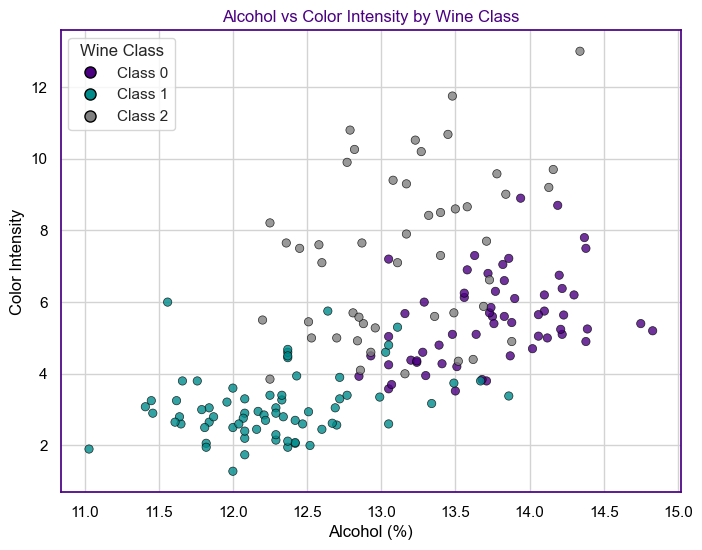

In [ ]:
# Build a color map using your purple / teal / gray theme
color_map = {
    0: "#4B0082",  # purple
    1: "#008B8B",  # teal
    2: "gray"      # gray
}

# Map each row's class to its display color
point_colors = wine["wine_class"].map(color_map)

plt.figure(figsize=(8,6))

plt.scatter(
    wine["alcohol_pct"],
    wine["color_intensity"],
    c=point_colors,
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

plt.xlabel("Alcohol (%)")
plt.ylabel("Color Intensity")
plt.title("Alcohol vs Color Intensity by Wine Class", color="#4B0082")

# Build legend manually with the right colors
handles = []
labels = []
for cls, color in color_map.items():
    handles.append(
        plt.Line2D(
            [], [],
            marker="o",
            linestyle="",
            markerfacecolor=color,
            markeredgecolor="black",
            markersize=8,
        )
    )
    labels.append(f"Class {cls}")

plt.legend(handles, labels, title="Wine Class", loc="upper left")
plt.show()


### Distribution of Wine Classes

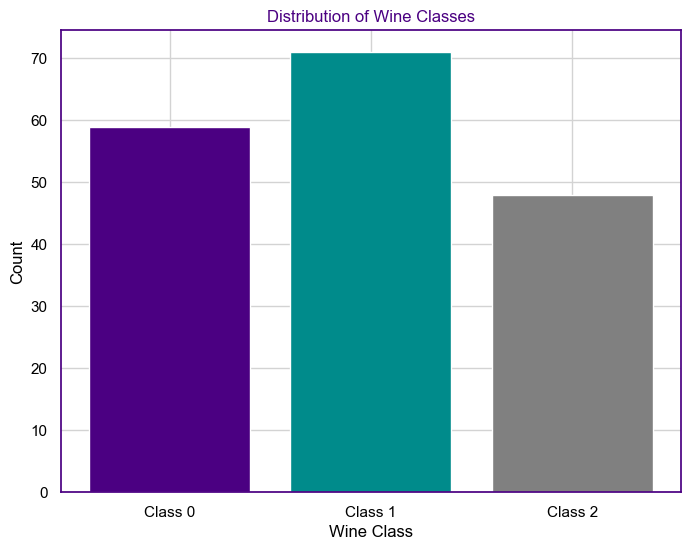

In [ ]:
# Show how many samples there are for Class 0, Class 1, and Class 2
class_counts = wine['wine_class'].value_counts().sort_index()  # counts for 0,1,2

colors = ["#4B0082", "#008B8B", "gray"]  # Class 0, Class 1, Class 2

plt.figure(figsize=(8,6))
plt.bar(class_counts.index, class_counts.values, color=colors)
plt.title("Distribution of Wine Classes", color="#4B0082")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.xticks([0,1,2], ["Class 0", "Class 1", "Class 2"])
plt.show()

### Reflection 2:

**1. What patterns or anomalies do you notice?**  
- The scatter plots show that wines with higher alcohol content also tend to have higher color intensity and Proline levels.  
- The count plot shows that the dataset has slightly more samples in Class 1 compared to Class 0 or Class 2.  
- No major anomalies appear, and all classes have similar sample sizes.  

**2. Do any features stand out as potential predictors?**  
Yes. *Alcohol percentage*, *color intensity*, and *proline* appear to be strong predictors for wine classification. These variables visually separate the classes and likely contribute heavily to determining wine type.

**3. Are there any visible class imbalances?**  
Yes. There are slightly more samples in Class 0 than in Classes 1 or 2. While this imbalance isn’t severe, it could influence model performance if not addressed in future predictive modeling steps.

## Section 4: Feature Selection/Modeling

### 3.1 Features and Target

### Target Variable (y)

### Input Features (X)

### Justification

### 3.2 Define Features (X) and Target (y)

### Reflection 3:
1. **Why are these features selected?**  
2. **Are there any features that are likely to be highly predictive of survival?** 

### Splitting

### Basic Train/Test split

In [ ]:
# Split the data into training and test sets (80/20 split)
# Display dataset sizes

### Stratified Train/Test split

### Compare Results

### Reflection 4
1. **Why might stratification improve model performance?**  
2. **How close are the training and test distributions to the original dataset?**  
3. **Which split method produced better class balance?**  